In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
Del_time = pd.read_csv("E:/Userfiles/Desktop/Python/Assignment 1/delivery_time.csv")

In [3]:
Del_time.info()
Del_time.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:>

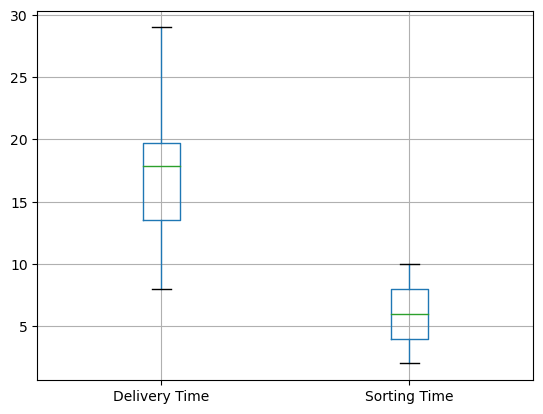

In [4]:
Del_time.boxplot()

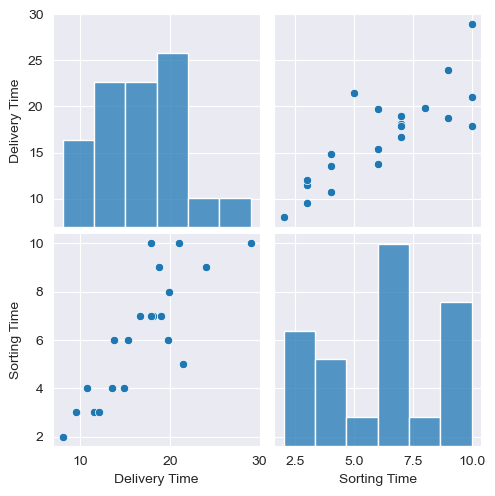

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(Del_time)
plt.show()

In [6]:
Del_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
Del_time=Del_time.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
Del_time

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
import statsmodels.formula.api as smf 
DT = smf.ols('delivery_time~sorting_time',data = Del_time).fit()
DT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        13:17:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
DT.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

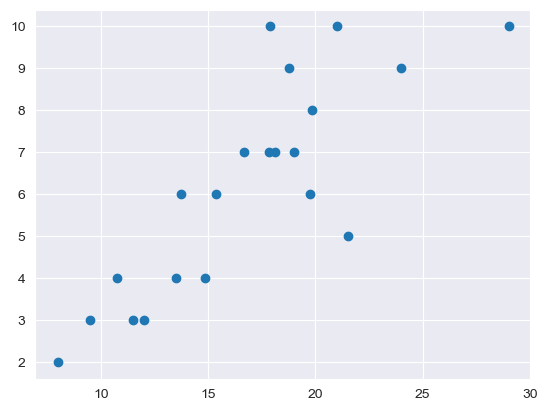

In [10]:
plt.scatter(Del_time['delivery_time'],Del_time['sorting_time'])
plt.show()

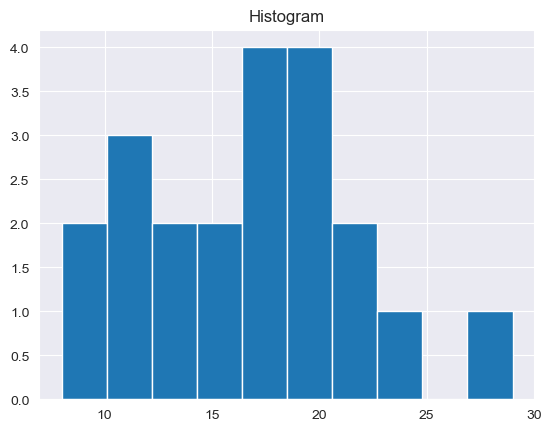

In [11]:
plt.hist(Del_time['delivery_time'])
 
plt.title("Histogram")
 
plt.show()

# Transformation

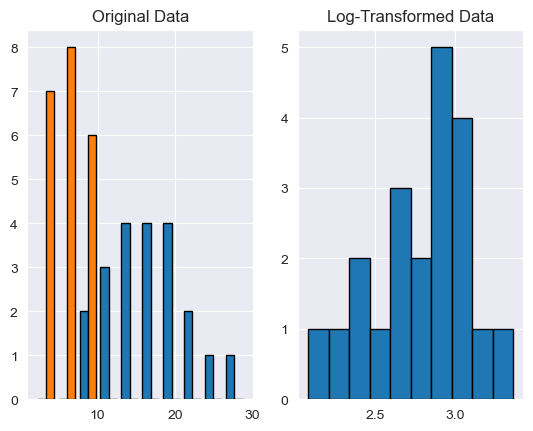

In [12]:
data_log = np.log(Del_time['delivery_time'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(Del_time, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')
plt.show()

In [13]:
data_log

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: delivery_time, dtype: float64

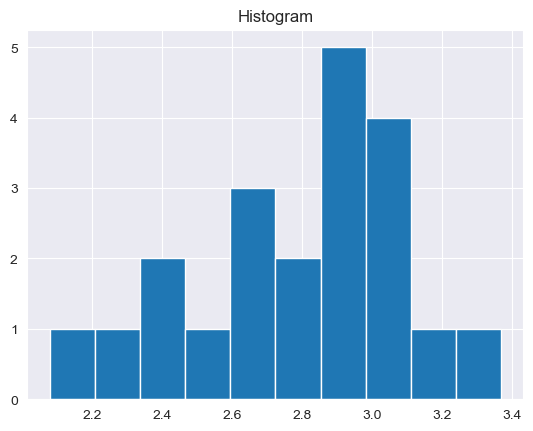

In [14]:
plt.hist(data_log)
 
plt.title("Histogram")
 
plt.show()

In [15]:
import statsmodels.formula.api as smf 
DT1 = smf.ols('data_log~sorting_time',data = Del_time).fit()
DT1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               data_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        13:18:01   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
DT1.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

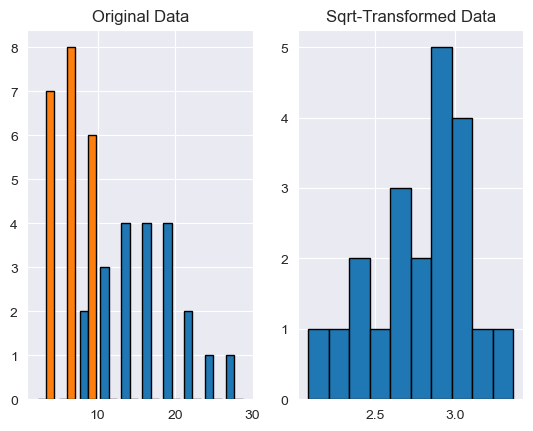

In [17]:
data_sqrt = np.sqrt(Del_time['delivery_time'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(Del_time, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Sqrt-Transformed Data')
plt.show()

In [18]:
data_sqrt

0     4.582576
1     3.674235
2     4.444097
3     4.898979
4     5.385165
5     3.917908
6     4.358899
7     3.082207
8     4.230839
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
20    4.636809
Name: delivery_time, dtype: float64

In [19]:
import statsmodels.formula.api as smf 
DT2 = smf.ols('data_sqrt~sorting_time',data = Del_time).fit()
DT2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              data_sqrt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           2.00e-06
Time:                        13:19:16   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
DT2.params

Intercept       2.772731
sorting_time    0.206632
dtype: float64

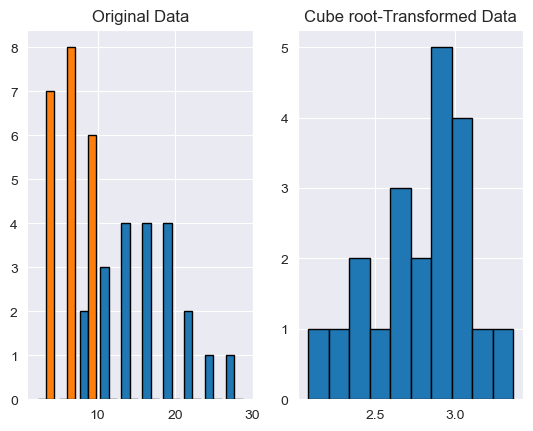

In [21]:
data_cbrt = np.cbrt(Del_time['delivery_time'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(Del_time, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube root-Transformed Data')
plt.show()

In [22]:
data_cbrt

0     2.758924
1     2.381102
2     2.703060
3     2.884499
4     3.072317
5     2.485246
6     2.668402
7     2.117912
8     2.615879
9     2.656646
10    2.706705
11    2.207002
12    2.555046
13    2.257179
14    2.291335
15    2.459618
16    2.395710
17    2.626069
18    2.000000
19    2.612465
20    2.780649
Name: delivery_time, dtype: float64

In [24]:
import statsmodels.formula.api as smf 
DT3 = smf.ols('data_cbrt~sorting_time',data = Del_time).fit()
DT3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              data_cbrt   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     46.08
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.75e-06
Time:                        13:20:35   Log-Likelihood:                 11.651
No. Observations:                  21   AIC:                            -19.30
Df Residuals:                      19   BIC:                            -17.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9951      0.086     23.283      0.000       1.816       2.174
sorting_time     0.0872      0.013      6.788      0.000       0.060       0.114
==============================================================================
Omnibus:                        1.873   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                0.966
Skew:                           0.523   Prob(JB):                        0.617
Kurtosis:                       3.106   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
DT3.params

Intercept       1.995120
sorting_time    0.087217
dtype: float64

##  "Log transformed data" gives the best result

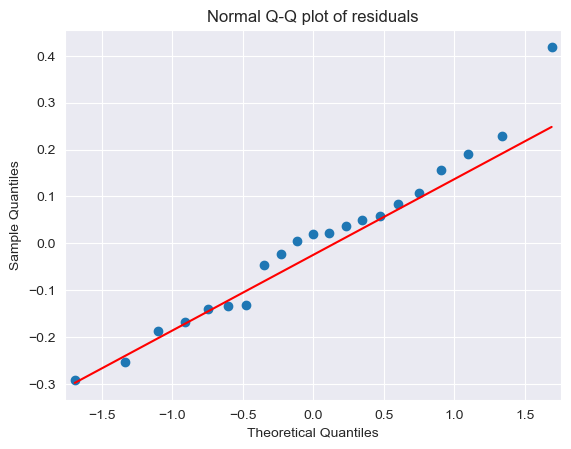

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(DT1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(DT1.resid>1))

[array([], dtype=int64)]

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

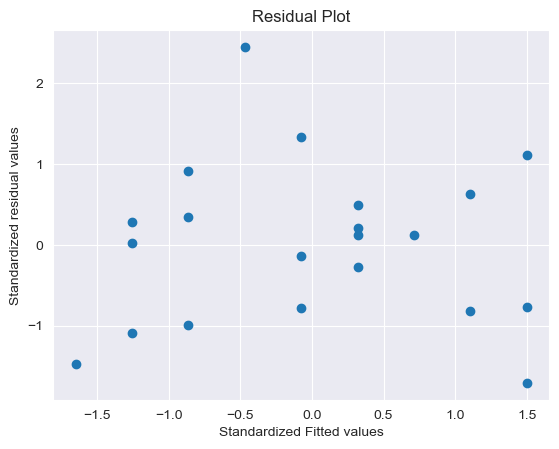

In [29]:
plt.scatter(get_standardized_values(DT1.fittedvalues),
            get_standardized_values(DT1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


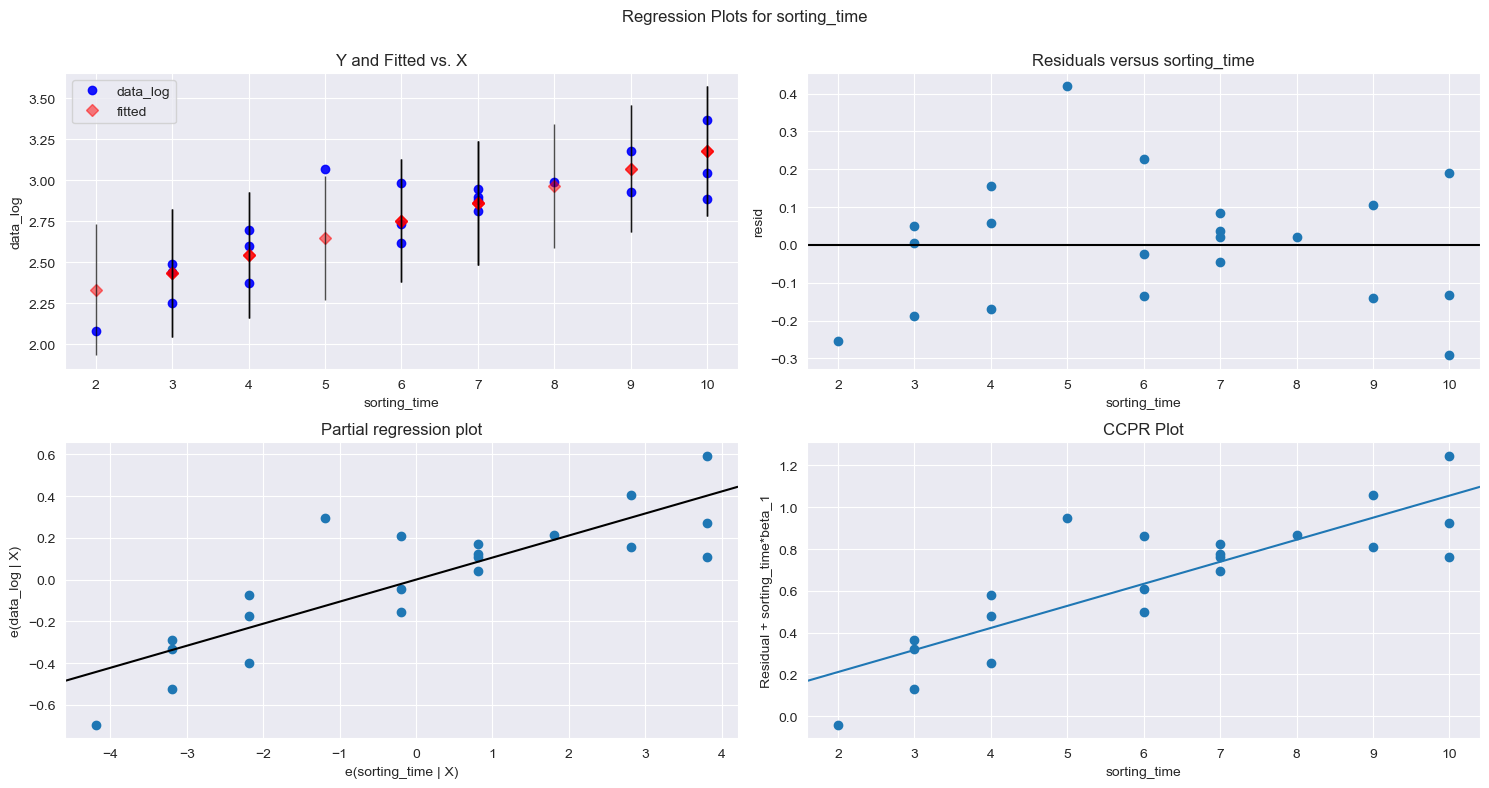

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(DT1, "sorting_time", fig=fig)
plt.show()

In [31]:
model_influence_V = DT1.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [32]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_log)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

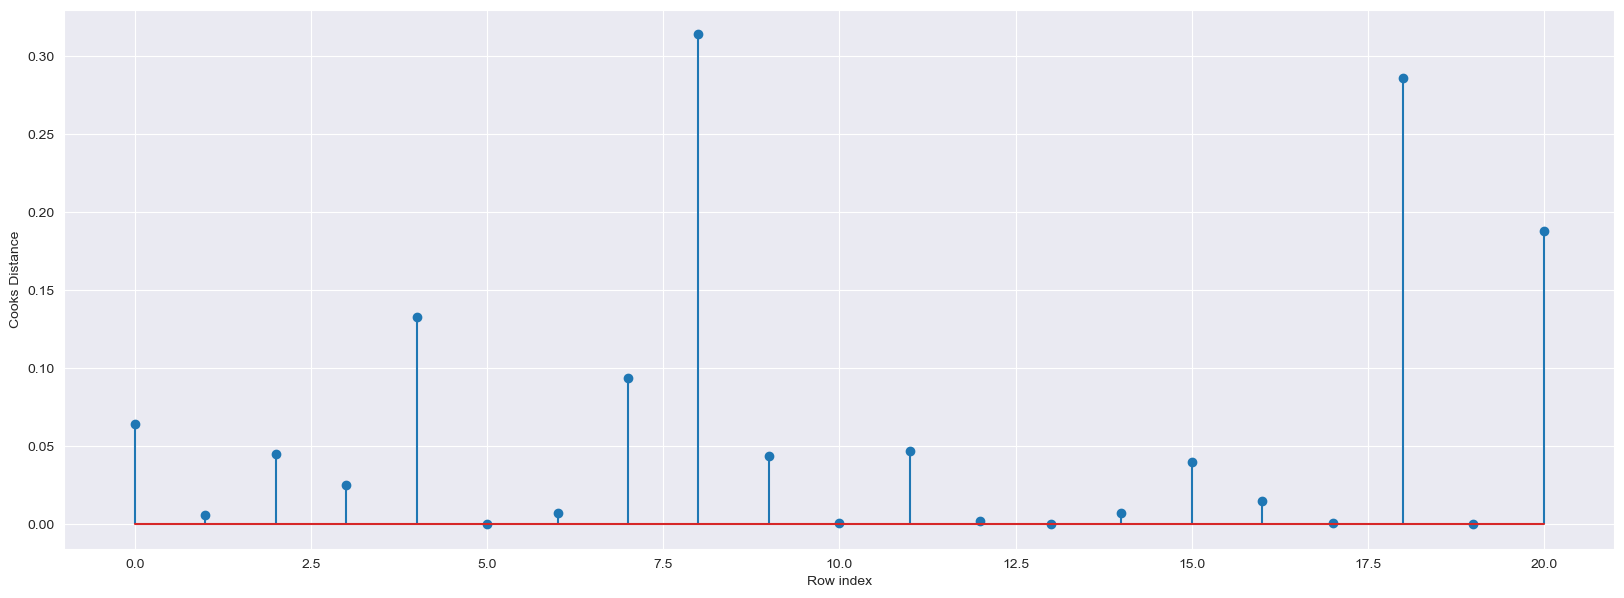

In [33]:
plt.show()

In [34]:
# Automatic Prediction for say sorting time 12,4
new_data=pd.Series([12,4]) 
new_data

0    12
1     4
dtype: int64

In [35]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,12
1,4


In [36]:
DT1.predict(data_pred)

0    3.387991
1    2.543578
dtype: float64

# Salary data

In [37]:
salary = pd.read_csv("E:/Userfiles/Desktop/Python/Assignment 1/Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [38]:
salary.info()
salary.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


YearsExperience    0
Salary             0
dtype: int64

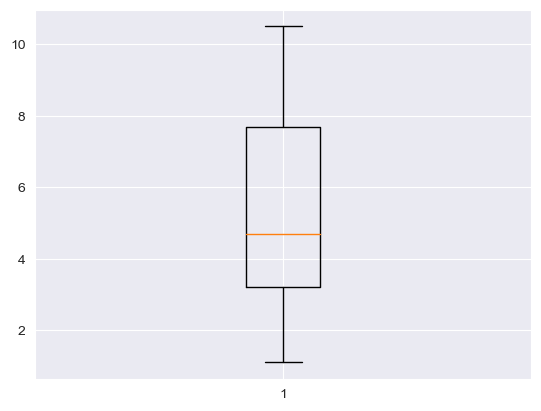

In [39]:
plt.boxplot(salary.YearsExperience)
plt.show()


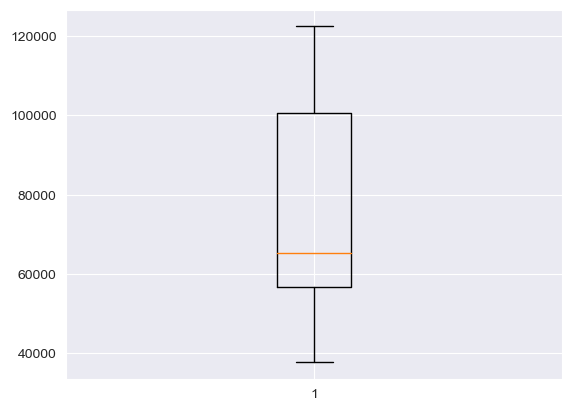

In [40]:
plt.boxplot(salary.Salary)
plt.show()

In [41]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


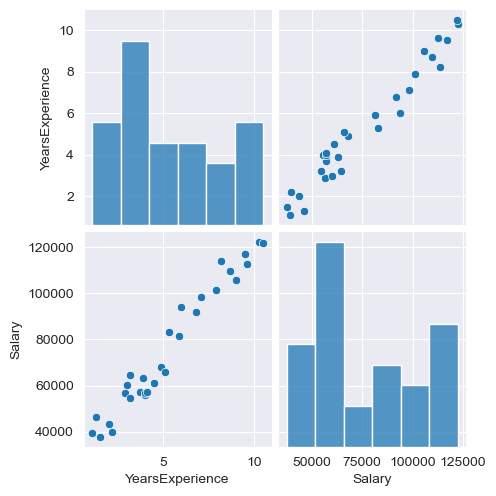

In [42]:
sns.set_style(style='darkgrid')
sns.pairplot(salary)
plt.show()

In [43]:
DTA = smf.ols('Salary~YearsExperience',data = salary).fit()
DTA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        13:24:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
DTA.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

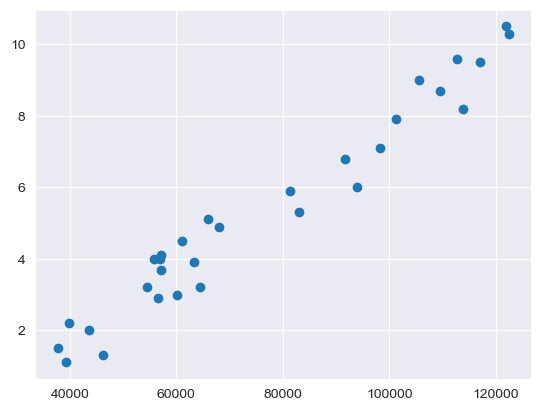

In [47]:
plt.scatter(salary['Salary'],salary['YearsExperience'])
plt.show()

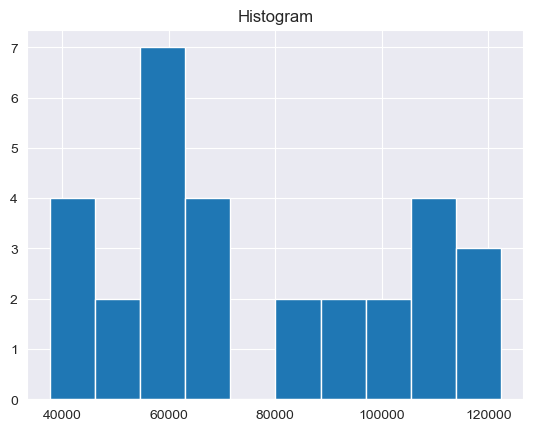

In [48]:
plt.hist(salary['Salary'])
 
plt.title("Histogram")
 
plt.show()

# Transformation

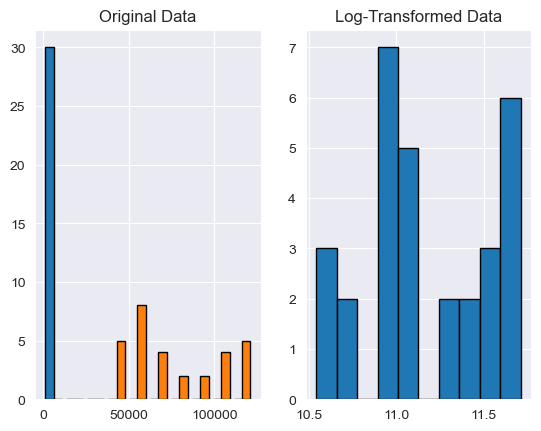

In [53]:
Data_log = np.log(salary['Salary'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(salary, edgecolor='black')
axs[1].hist(Data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')
plt.show()

In [54]:
Data_log

0     10.580073
1     10.740843
2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.710727
Name: Salary, dtype: float64

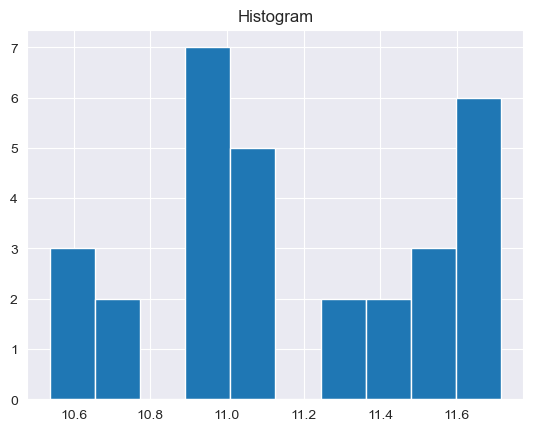

In [55]:
plt.hist(Data_log)
 
plt.title("Histogram")
 
plt.show()

In [63]:
import statsmodels.formula.api as smf 
dt1 = smf.ols('Data_log~YearsExperience',data = salary).fit()
dt1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Data_log   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        13:37:14   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
dt1.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

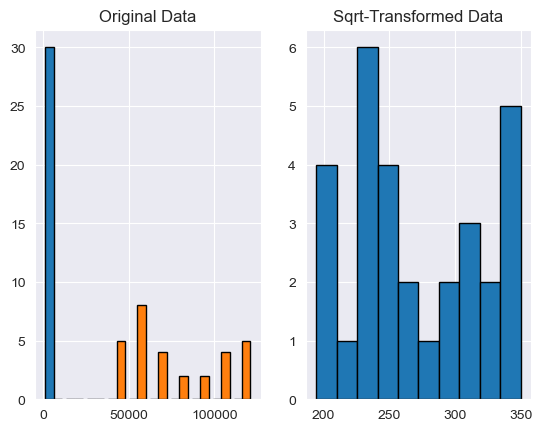

In [58]:
Data_sqrt = np.sqrt(salary['Salary'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(salary, edgecolor='black')
axs[1].hist(Data_sqrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Sqrt-Transformed Data')
plt.show()

In [59]:
Data_sqrt

0     198.350700
1     214.953483
2     194.244691
3     208.626460
4     199.727314
5     237.995798
6     245.254969
7     233.334524
8     253.860198
9     239.142217
10    251.431899
11    236.207536
12    238.656657
13    238.916303
14    247.206392
15    260.649190
16    256.961087
17    288.249892
18    285.242003
19    306.496330
20    302.882816
21    313.485247
22    318.279751
23    337.360341
24    330.803567
25    324.933839
26    342.007310
27    335.611382
28    349.844251
29    349.101704
Name: Salary, dtype: float64

In [64]:
import statsmodels.formula.api as smf 
dt2 = smf.ols('Data_sqrt~YearsExperience',data = salary).fit()
dt2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Data_sqrt   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           9.78e-20
Time:                        13:37:54   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
dt2.params

Intercept          180.700221
YearsExperience     17.056532
dtype: float64

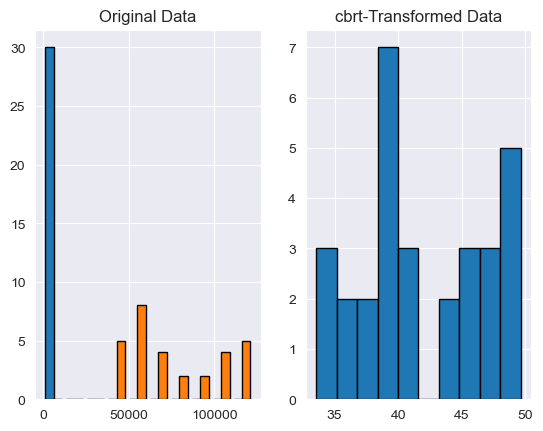

In [61]:
Data_cbrt = np.cbrt(salary['Salary'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(salary, edgecolor='black')
axs[1].hist(Data_cbrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('cbrt-Transformed Data')
plt.show()

In [62]:
Data_cbrt

0     34.011242
1     35.883626
2     33.540235
3     35.175984
4     34.168426
5     38.404271
6     39.181273
7     37.901174
8     40.092494
9     38.527500
10    39.836415
11    38.211654
12    38.475331
13    38.503232
14    39.388834
15    40.804142
16    40.418318
17    43.636117
18    43.332025
19    45.458683
20    45.100680
21    46.147134
22    46.616465
23    48.461407
24    47.831440
25    47.263944
26    48.905412
27    48.293771
28    49.649685
29    49.579405
Name: Salary, dtype: float64

In [65]:
import statsmodels.formula.api as smf 
dt3 = smf.ols('Data_cbrt~YearsExperience',data = salary).fit()
dt3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Data_cbrt   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     482.5
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           3.42e-19
Time:                        13:38:30   Log-Likelihood:                -47.463
No. Observations:                  30   AIC:                             98.93
Df Residuals:                      28   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.4539      0.479     67.821      0.000      31.474      33.434
YearsExperience     1.7515      0.080     21.966      0.000       1.588       1.915
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.611
Skew:                           0.385   Prob(JB):                        0.447
Kurtosis:                       2.166   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
dt3.params

Intercept          32.453864
YearsExperience     1.751471
dtype: float64

## "Original data" gives the best result

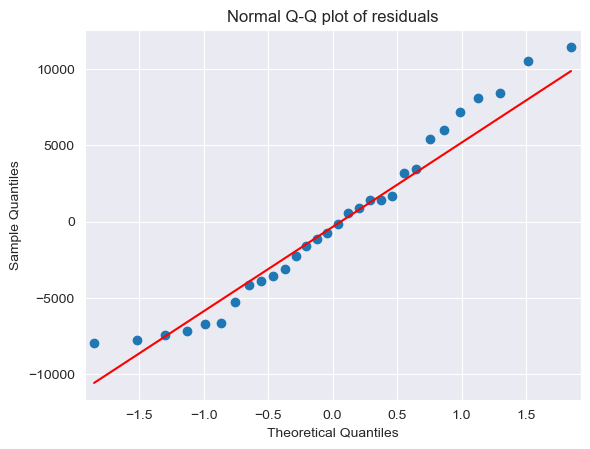

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(DTA.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [48]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

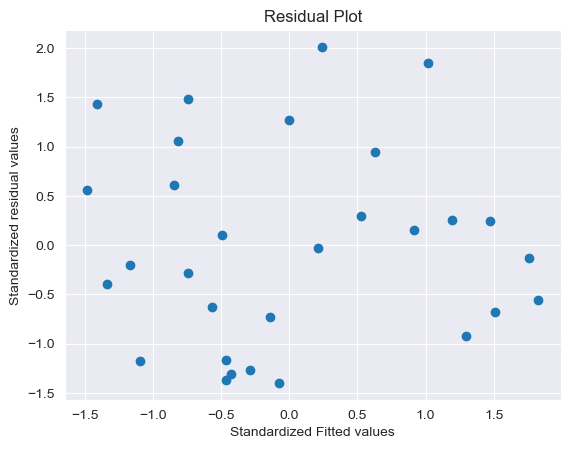

In [49]:
plt.scatter(get_standardized_values(DTA.fittedvalues),
            get_standardized_values(DTA.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


<Figure size 1500x800 with 0 Axes>

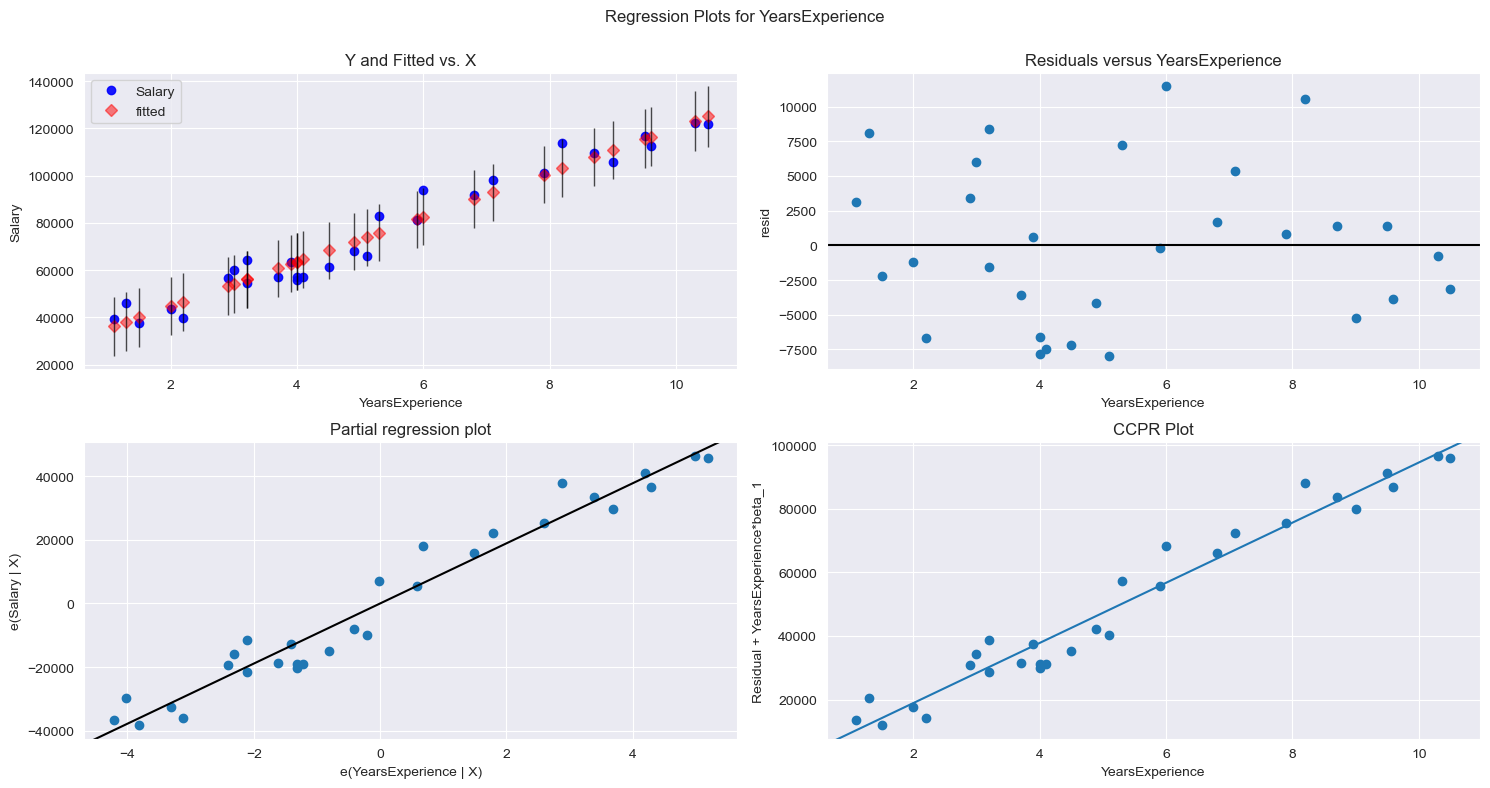

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(DTA, "YearsExperience", fig=fig)
plt.show()

In [52]:
new_datas=pd.Series([11,18])
new_datas

0    11
1    18
dtype: int64

In [53]:
data_preds=pd.DataFrame(new_datas,columns=['YearsExperience'])
data_preds

,YearsExperience
0,11
1,18


In [54]:
DTA.predict(data_preds)

0    129741.785735
1    195891.521985
dtype: float64